In [307]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [308]:
df = pd.read_csv('tx19_bridges_sample.csv')
df = df.set_index('Structure_id')
df.head()

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200


In [309]:
df['age'] = 2021 - df['Year']
df.head()

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,age
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17


In [310]:
df1 = df[['age', 'AverageDaily', 'Trucks_percent', 'Material', 'Design', 'Deck_rating', 'Superstr_rating', 'Substr_rating']].copy()
df1[['Material', 'Design', 'Deck_rating', 'Superstr_rating', 'Substr_rating']] = df1[['Material', 'Design', 'Deck_rating', 'Superstr_rating', 'Substr_rating']].astype('category')
df1.head()
df1.dtypes

age                   int64
AverageDaily          int64
Trucks_percent      float64
Material           category
Design             category
Deck_rating        category
Superstr_rating    category
Substr_rating      category
dtype: object

## Comparing Categorical Variables

In [311]:
df1.head()

,age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,16,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,9,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,71,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,17,150,4.0,Concrete,Beam,Good,Very Good,Very Good


Use a crosstab table to compare material and design. Observe the relationships between the variables, for example we should find that 100% of slab bridges are made from concrete. This is a relationship between these two variables that may have an effect on our linear regression later. 

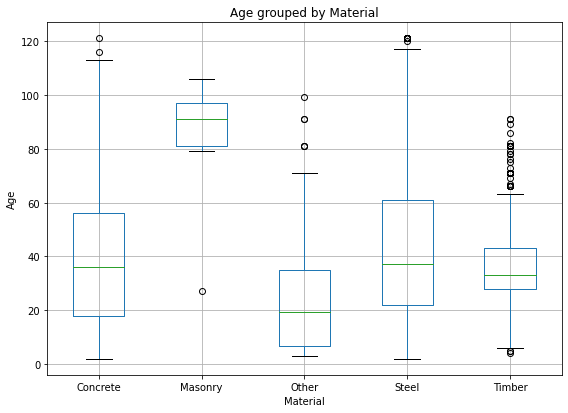

In [312]:
df1.boxplot(column='age', by='Material',figsize=(8,6))
plt.title('Age grouped by Material')
plt.ylabel('Age')
plt.suptitle('')
plt.tight_layout()
plt.show()

I will use a cutoff point of 100 years as this value is just above the 3rd quartile of masonry bridges which has the highest grouping of ages out of all the materials. Therefore, the data will contain bridges of all material types but eliminate some of the outlying extremely old bridges of 100 and above years of age.

In [313]:
df2 = df1[df1.age <= 100].copy()
df2.head()

,age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,16,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,9,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,71,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,17,150,4.0,Concrete,Beam,Good,Very Good,Very Good


In [314]:
df2[['age','AverageDaily','Trucks_percent']].corr()

,age,AverageDaily,Trucks_percent
age,1.000000,-0.054868,0.226556
AverageDaily,-0.054868,1.000000,0.022547
Trucks_percent,0.226556,0.022547,1.000000


In [315]:
df2.Material.value_counts()

Concrete    27055
Steel        6580
Timber        465
Other          48
Masonry        11
Name: Material, dtype: int64

As both Masonry and Other have very small numbers of bridges, I will combine them into just 'Other_M'. The M is for regression purposes later. I will do the same with Design by appending a 'D' to it's 'Other' value.

In [316]:
df2.Material = df2.Material.apply(lambda x: 'Other_M' if x == 'Other' else ('Other_M' if x == 'Masonry' else x))

In [317]:
df2.Material.value_counts()

Concrete    27055
Steel        6580
Timber        465
Other_M        59
Name: Material, dtype: int64

In [318]:
df2.Design.value_counts()

Beam          28276
Slab           4308
Other          1243
Arch            140
Truss           106
Frame            68
Movable          13
Suspension        5
Name: Design, dtype: int64

As Design has a number of attributes with low numbers I have combined them all into 'Other_D' as well.

In [319]:
df2.Design = df2.Design.apply(lambda x: 'Other_D' if x in ['Other', 'Arch', 'Truss', 'Frame', 'Movable', 'Suspension'] else x)
df2.Design.value_counts()

Beam       28276
Slab        4308
Other_D     1575
Name: Design, dtype: int64

In [320]:
df2.Deck_rating = df.Deck_rating.apply(lambda x: 0 if x == 'Failed' else 1 if x in ['Critical', 'Serious', 'Failing']
                                     else 2 if x in ['Poor', 'Satisfactory'] else 3 if x in ['Fair', 'Good'] else 4 if x in ['Excellent', 'Very Good'] 
                                       else x)
df2 = df2.loc[~df2.Deck_rating.isna()].copy()
df2.Superstr_rating = df.Superstr_rating.apply(lambda x: 0 if x == 'Failed' else 1 if x in ['Critical', 'Serious', 'Failing']
                                     else 2 if x in ['Poor', 'Satisfactory'] else 3 if x in ['Fair', 'Good'] else 4 if x in ['Excellent', 'Very Good'] else x)
df2 = df2.loc[~df2.Superstr_rating.isna()].copy()
df2.Substr_rating = df.Substr_rating.apply(lambda x: 0 if x == 'Failed' else 1 if x in ['Critical', 'Serious', 'Failing']
                                     else 2 if x in ['Poor', 'Satisfactory'] else 3 if x in ['Fair', 'Good'] else 4 if x in ['Excellent', 'Very Good'] 
                                           else 'NaN' if x == np.isnan(x) else x)
df2 = df2.loc[~df2.Substr_rating.isna()].copy()


I group the ratings and give them a numerical value within Deck_rating, Superstr_rating and Substr_rating. 'Failed' = 0,'Critical, Serious or Failing' = 1, 'Poor, Satisfactory' = 2, 'Fair, Good' = 3 and 'Very Good, Excellent' = 4. This way we now have a continuous variable we can perform regression on. I have removed rows that have NA values as there were only small numbers of them so it should not have a noticeable effect on the linear regression.  

In [321]:
df2['Score'] = df2.Deck_rating + df2.Superstr_rating + df2.Substr_rating
df2.head()

,age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Score
Structure_id,,,,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,3.0,4.0,4,11.0
000021521-00181,16,1,0.0,Concrete,Slab,3.0,3.0,4,10.0
000021521-TMP20,9,100,0.0,Concrete,Beam,4.0,4.0,4,12.0
000021525-00012,71,80,0.0,Timber,Beam,3.0,3.0,2,8.0
000021580-00092,17,150,4.0,Concrete,Beam,3.0,4.0,4,11.0


In [322]:
df3 = df2[['age', 'AverageDaily', 'Trucks_percent', 'Material', 'Design', 'Score']].copy()
df3.head()

,age,AverageDaily,Trucks_percent,Material,Design,Score
Structure_id,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,11.0
000021521-00181,16,1,0.0,Concrete,Slab,10.0
000021521-TMP20,9,100,0.0,Concrete,Beam,12.0
000021525-00012,71,80,0.0,Timber,Beam,8.0
000021580-00092,17,150,4.0,Concrete,Beam,11.0


plot heatmap and scatter matrix

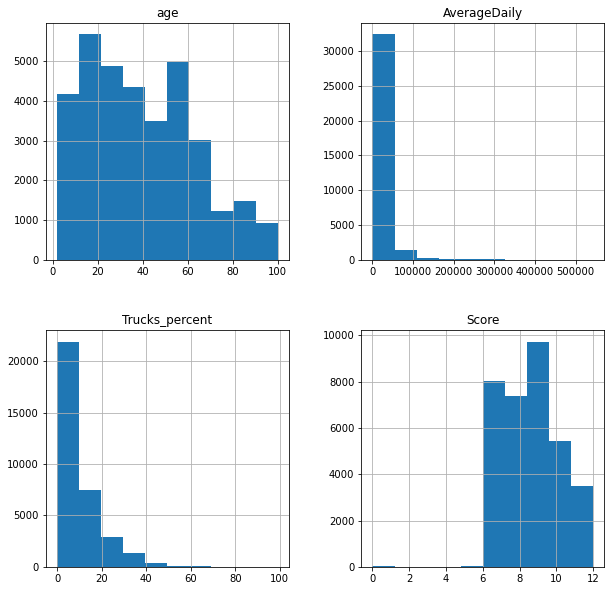

In [323]:
df3.hist(figsize=(10,10))
plt.show()

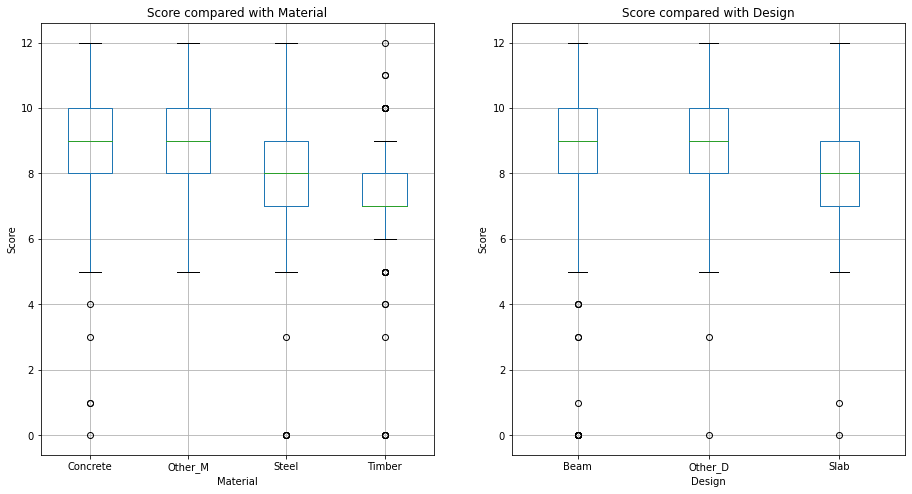

In [324]:
fig, (a1, a2) = plt.subplots(1,2, figsize=(15,8))
a1 = df3.boxplot(column='Score', by='Material', ax=a1)
a1.set_ylabel('Score')
a1.set_title('Score compared with Material')
a2 = df3.boxplot(column='Score', by='Design', ax=a2)
a2.set_ylabel('Score')
a2.set_title('Score compared with Design')
plt.suptitle('')
plt.show()

As we can see within the first boxplot comparing score and material we can see that both concrete and other have very similar plots with a median score of 9. However, concrete has a number of outliers lower down with scores of 4 and below. This is likely due to there being far more bridges made from concrete so it is more likely that there are some in worse states. Steel has a similar shape to concrete and other but shifted down to a median of 8 with a couple of outliers at scores of 3 and 0. Timber is the most interesting of them all as its median appears to also be its 1st quartile and is lower than the other materials at 7. It has a far smaller whisker range than the others and a large numbers of outliers both above and below. This is not too surprising when compared to materials such as concrete and steel as timber could be assumed to be less resilient than these materials. \
When score is compared with design is is almost analogous to the material boxplot. Both beam and other designs have very similar plots sharing the same interquartile range with medians based at 9 and a number of outliers below showing bridges in disrepair. Slab designs are almost identical to the other two except it has slipped down to a median of 8 with a couple of outliers and the same IQR. 

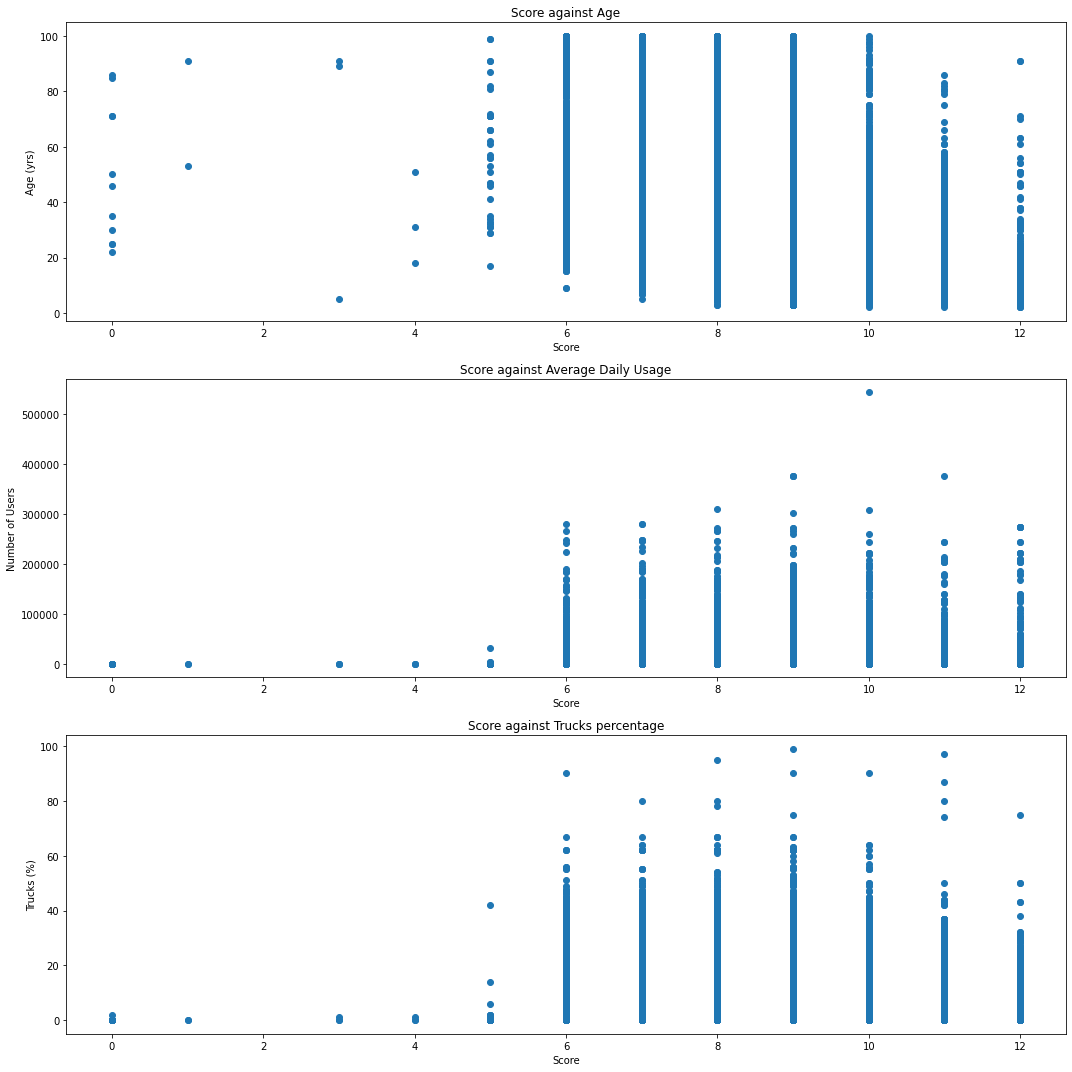

In [325]:
fig, (a1, a2, a3) = plt.subplots(3,1, figsize=(15,15))
a1.scatter(df3.Score, df3.age)
a1.set_title('Score against Age')
a1.set_ylabel('Age (yrs)')
a1.set_xlabel('Score')
a2.scatter(df3.Score, df3.AverageDaily)
a2.set_title('Score against Average Daily Usage')
a2.set_ylabel('Number of Users')
a2.set_xlabel('Score')
a3.scatter(df3.Score, df3.Trucks_percent)
a3.set_title('Score against Trucks percentage')
a3.set_ylabel('Trucks (%)')
a3.set_xlabel('Score')
plt.tight_layout()
plt.show()

Plot correlation table and heatmap 

In [326]:
df3.corr()

,age,AverageDaily,Trucks_percent,Score
age,1.000000,-0.054886,0.226598,-0.586142
AverageDaily,-0.054886,1.000000,0.022498,0.014837
Trucks_percent,0.226598,0.022498,1.000000,-0.073416
Score,-0.586142,0.014837,-0.073416,1.000000


In [327]:
material_OHE = pd.get_dummies(df3['Material'])
design_OHE = pd.get_dummies(df3['Design'])

I use One-Hot-Encoding to convert the categorical attributes of both Material and Design into numerical values that can be used in multiple linear regression. This means that we can individually remove each type of material or design to see what effect it has on the bridge's overall score. 

In [328]:
df4 = df3.join([material_OHE, design_OHE]).copy()
df4 = df4.drop(['Material', 'Design'], axis=1)
df4 = df4[['age', 'AverageDaily', 'Trucks_percent', 'Concrete', 'Other_M', 'Steel', 'Timber', 'Beam', 'Other_D', 'Slab', 'Score']]
df4.head()

,age,AverageDaily,Trucks_percent,Concrete,Other_M,Steel,Timber,Beam,Other_D,Slab,Score
Structure_id,,,,,,,,,,,
000021521-00101,16,1,0.0,1,0,0,0,0,0,1,11.0
000021521-00181,16,1,0.0,1,0,0,0,0,0,1,10.0
000021521-TMP20,9,100,0.0,1,0,0,0,1,0,0,12.0
000021525-00012,71,80,0.0,0,0,0,1,1,0,0,8.0
000021580-00092,17,150,4.0,1,0,0,0,1,0,0,11.0


In [329]:
x = df4[['age', 'AverageDaily', 'Trucks_percent', 'Concrete', 'Other_M', 'Steel', 'Timber', 'Beam', 'Other_D', 'Slab']]
y = df4['Score']

In [330]:
lr = LinearRegression()
model = lr.fit(x,y)
print(model.coef_)

[-3.58547612e-02 -1.46336058e-06  1.76903199e-03  5.64347175e-01
  6.96556128e-01 -4.02038530e-01 -8.58864773e-01 -5.90321619e-02
  1.93149387e-01 -1.34117225e-01]


In [331]:
y_predict = lr.predict(x)

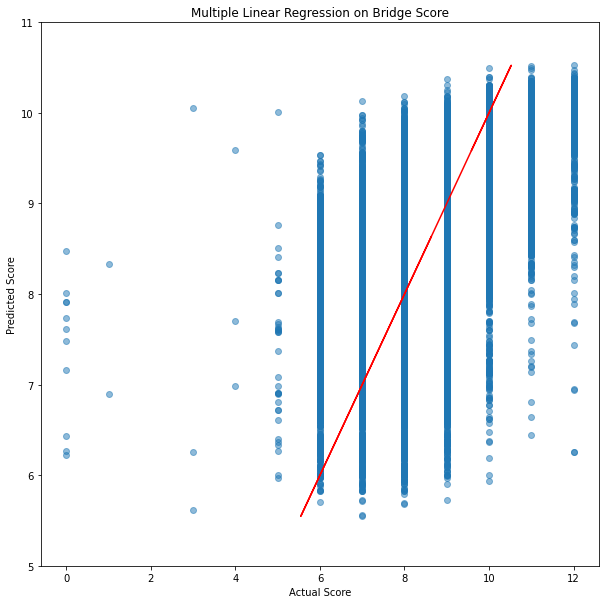

In [332]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y, y_predict, alpha=0.5)
plt.title('Multiple Linear Regression on Bridge Score')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.ylim(5,11)
plt.plot(y_predict,y_predict, color='r')
plt.show()

In [333]:
lr.score(x,y)

0.4183659988566407

From here I attempt to use standard scaler and minmax scaler but they both give the same results as above.

In [334]:
scaler = StandardScaler()

In [335]:
df_s = scaler.fit_transform(df4)
df_s = pd.DataFrame(df_s, columns=['age', 'AverageDaily', 'Trucks_percent', 'Concrete', 'Other_M', 'Steel', 'Timber', 'Beam', 'Other_D', 'Slab','Score'])
df_s

,age,AverageDaily,Trucks_percent,Concrete,Other_M,Steel,Timber,Beam,Other_D,Slab,Score
0,-0.987490,-0.480510,-0.831108,0.512397,-0.0416,-0.488424,-0.117488,-2.193203,-0.219513,2.632029,1.596489
1,-0.987490,-0.480510,-0.831108,0.512397,-0.0416,-0.488424,-0.117488,-2.193203,-0.219513,2.632029,0.924854
2,-1.284900,-0.476431,-0.831108,0.512397,-0.0416,-0.488424,-0.117488,0.455954,-0.219513,-0.379935,2.268123
3,1.349305,-0.477255,-0.831108,-1.951611,-0.0416,-0.488424,8.511472,0.455954,-0.219513,-0.379935,-0.418415
4,-0.945003,-0.474371,-0.444810,0.512397,-0.0416,-0.488424,-0.117488,0.455954,-0.219513,-0.379935,1.596489
...,...,...,...,...,...,...,...,...,...,...,...
34147,-0.520131,-0.468190,3.031869,0.512397,-0.0416,-0.488424,-0.117488,0.455954,-0.219513,-0.379935,0.253220
34148,-0.775054,-0.468190,3.031869,0.512397,-0.0416,-0.488424,-0.117488,0.455954,-0.219513,-0.379935,0.253220
34149,-0.605105,-0.431107,1.583253,0.512397,-0.0416,-0.488424,-0.117488,0.455954,-0.219513,-0.379935,0.253220
34150,-0.392669,-0.468190,0.617508,0.512397,-0.0416,-0.488424,-0.117488,0.455954,-0.219513,-0.379935,-0.418415


In [336]:
x_n = df_s[['age', 'AverageDaily', 'Trucks_percent', 'Concrete', 'Other_M', 'Steel', 'Timber', 'Beam', 'Other_D', 'Slab']]
y_n = df_s['Score']

In [337]:
model2 = lr.fit(x_n,y_n)

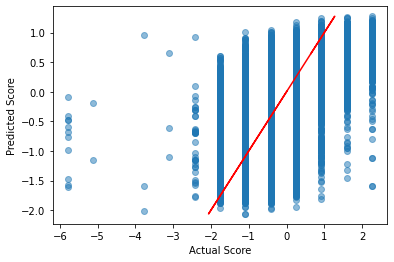

In [338]:
yn_predict = lr.predict(x_n)
plt.scatter(y_n, yn_predict, alpha=0.5)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
#plt.ylim(5,12)
plt.plot(yn_predict,yn_predict, color='r')
plt.show()

In [339]:
lr.score(x_n, y_n)

0.41836599885664083

In [340]:
minmax = MinMaxScaler()
MM = minmax.fit_transform(df4)

In [341]:
df_mm = pd.DataFrame(MM, columns=['age', 'AverageDaily', 'Trucks_percent', 'Concrete', 'Other_M', 'Steel', 'Timber', 'Beam', 'Other_D', 'Slab','Score'])
df_mm.head()


,age,AverageDaily,Trucks_percent,Concrete,Other_M,Steel,Timber,Beam,Other_D,Slab,Score
0,0.142857,0.000002,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.916667
1,0.142857,0.000002,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.833333
2,0.071429,0.000184,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000
3,0.704082,0.000147,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.666667
4,0.153061,0.000276,0.040404,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.916667


In [342]:
x_m = df_mm[['age', 'AverageDaily', 'Trucks_percent', 'Concrete', 'Other_M', 'Steel', 'Timber', 'Beam', 'Other_D', 'Slab']]
y_m = df_mm['Score']

In [343]:
np.std(y_m)

0.124075441934181

In [344]:
model3 = lr.fit(x_m,y_m)
model3.score(x_m,y_m)

0.4183115335486848

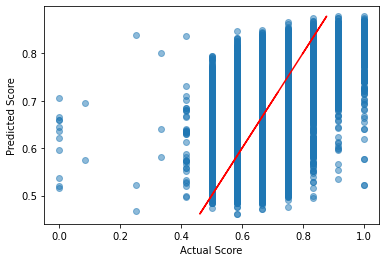

In [345]:
ym_predict = lr.predict(x_m)
plt.scatter(y_m, ym_predict, alpha=0.5)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
#plt.ylim(5,12)
plt.plot(ym_predict,ym_predict, color='r')
plt.show()